# Table of Contents
 <p>

In [28]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

# set to use tex, but make sure it is sans-serif fonts only
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{cmbright}')
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})

# Magic function to make matplotlib inline;
# other style specs must come AFTER
%matplotlib inline

# This enables SVG graphics inline. 
# There is a bug, so uncomment if it works.
%config InlineBackend.figure_formats = {'png', 'retina'}

# JB's favorite Seaborn settings for notebooks
rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style("dark")

mpl.rcParams['xtick.labelsize'] = 16 
mpl.rcParams['ytick.labelsize'] = 16 
mpl.rcParams['legend.fontsize'] = 14

In [39]:
n2_1= pd.read_csv('../../sleuth_all_adjusted/kallisto/results/Project_17434_indexN704-N517/kallisto/abundance.tsv', sep='\t')
n2_2= pd.read_csv('../../sleuth_all_adjusted/kallisto/results/Project_17435_indexN704-N502/kallisto/abundance.tsv', sep='\t')
n2_3= pd.read_csv('../../sleuth_all_adjusted/kallisto/results/Project_17436_indexN704-N503/kallisto/abundance.tsv', sep='\t')

egl_1= pd.read_csv('../../sleuth_all_adjusted/kallisto/results/Project_17437_indexN704-N504/kallisto/abundance.tsv', sep='\t')
egl_2= pd.read_csv('../../sleuth_all_adjusted/kallisto/results/Project_17438_indexN704-N505/kallisto/abundance.tsv', sep='\t')
egl_3= pd.read_csv('../../sleuth_all_adjusted/kallisto/results/Project_17439_indexN704-N506/kallisto/abundance.tsv', sep='\t')

egl9_beta = pd.read_csv('../../sleuth_all_adjusted/kallisto/betasB.csv')

In [30]:
frames = []

for df in [n2_1, n2_2, n2_3]:
    df['genotype'] = 'wt'
    frames += [df]

for df in [egl_1, egl_2, egl_3]:
    df['genotype'] = 'egl-9'
    frames += [df]

In [31]:
tidy = pd.concat(frames)

In [158]:
plot_up = tidy[tidy.target_id == 'R08E5.3'].copy()
plot_up['logtpm'] = plot_up.tpm.apply(np.log)
plot_up['logcounts'] = plot_up.est_counts.apply(np.log)
plot_up['estcounts'] = plot_up['est_counts']

plot_down = tidy[tidy.target_id == 'F15E11.15a'].copy()
plot_down['logtpm'] = plot_down.tpm.apply(np.log)
plot_down['logcounts'] = (plot_down.est_counts + .5).apply(np.log)
plot_down['estcounts'] = plot_down['est_counts']

In [143]:
bup = egl9_beta[egl9_beta.target_id == 'R08E5.3'].b.values[0]
bdown = egl9_beta[egl9_beta.target_id == 'F15E11.15a'].b.values[0]

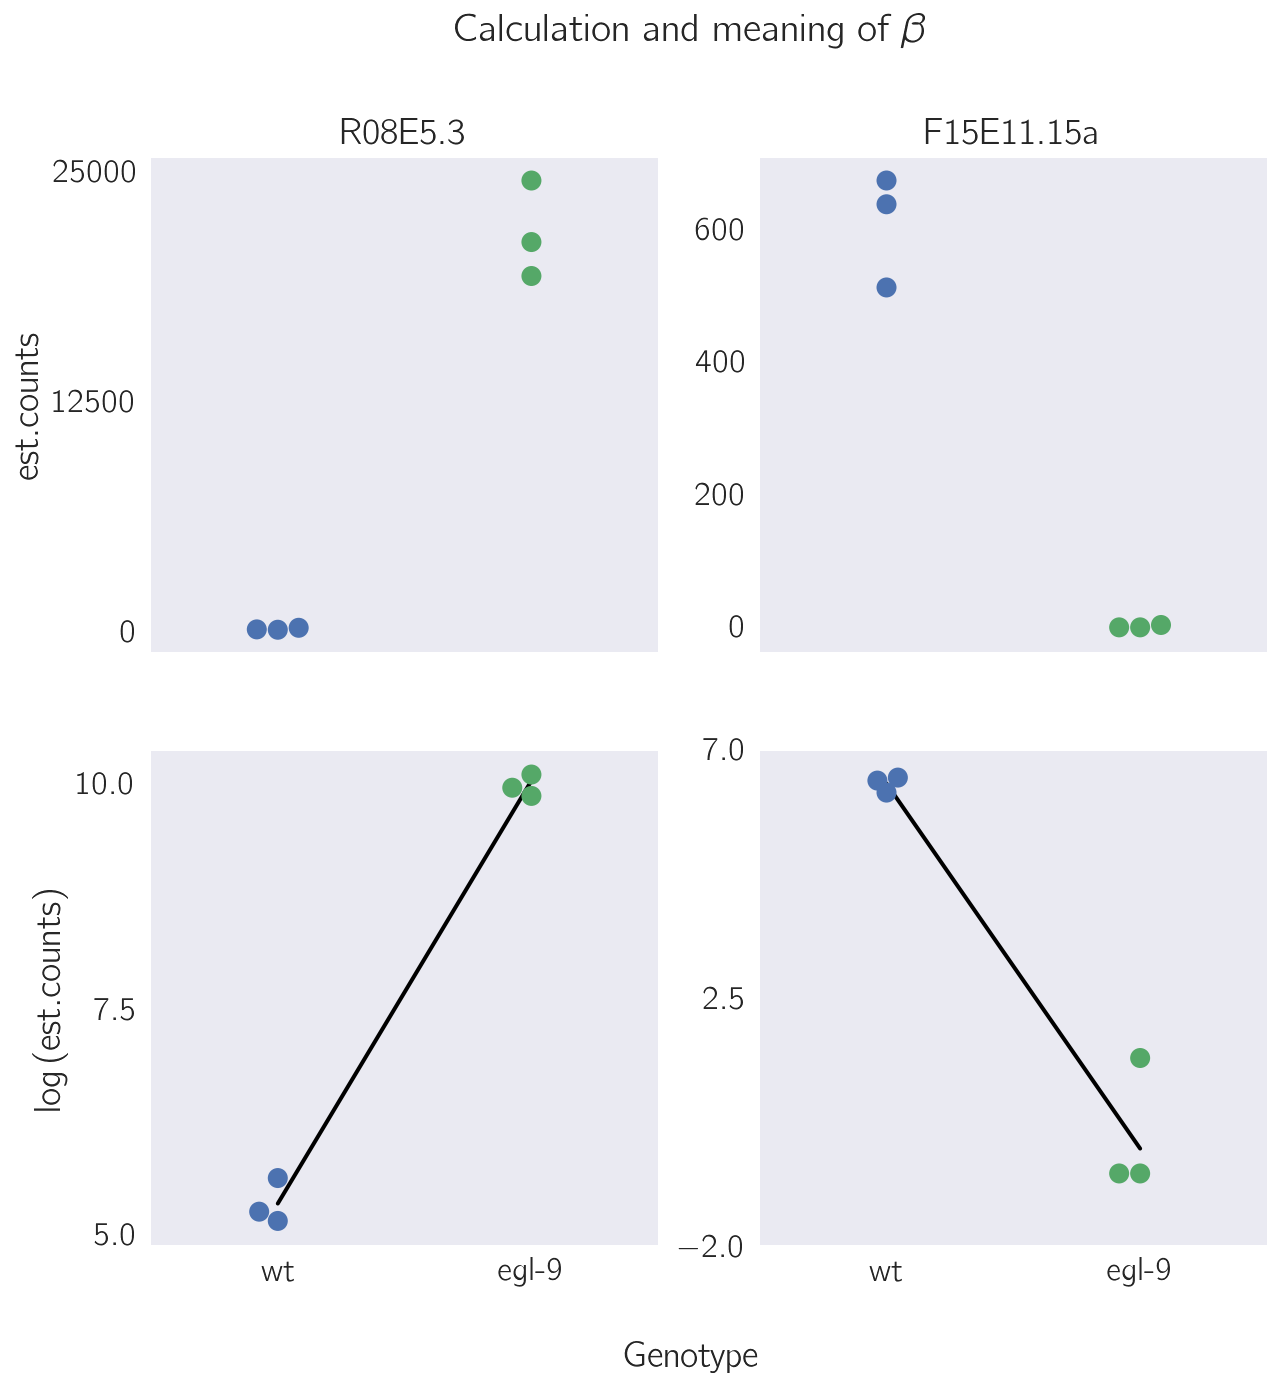

In [197]:
x = np.linspace(0, 1)

fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=False, figsize=(10, 10))

fig.suptitle(r'Calculation and meaning of \beta', fontsize=20)


sns.swarmplot(x='genotype', y='estcounts', data=plot_up, size=10, ax=ax[0, 0])
ax[0, 0].set_yticks([0, 12500, 25000])
ax[0, 0].set_ylabel('est.counts')
ax[0, 0].set_xlabel('')
ax[0, 0].set_title('R08E5.3')


sns.swarmplot(x='genotype', y='logcounts', data=plot_up, size=10, ax=ax[1, 0])
plt.ylim([5, 11])
ax[1, 0].set_yticks([5, 7.5, 10])
ax[1, 0].plot(x, x*bup + plot_up[plot_up.genotype == 'wt'].logcounts.mean(), 'k')
ax[1, 0].set_xlabel('')
ax[1, 0].set_ylabel(r'$\log{(\mathrm{est.counts})}$')
ax[1, 0].set_xticks([0, 1])


sns.swarmplot(x='genotype', y='estcounts', data=plot_down, size=10, ax=ax[0, 1])
ax[0, 1].set_xlabel('')
ax[0, 1].set_ylabel('')
ax[0, 1].set_title('F15E11.15a')


sns.swarmplot(x='genotype', y='logcounts', data=plot_down, size=10, ax=ax[1, 1])
plt.ylim([-2, 7])
ax[1, 1].set_yticks([-2, 2.5, 7])
ax[1, 1].plot(x, x*bdown + plot_down[plot_down.genotype == 'wt'].logcounts.mean(), 'k')
ax[1, 1].set_xlabel('')
ax[1, 1].set_ylabel('')

fig.text(0.5, 0.04, 'Genotype', ha='center', size=18)

plt.savefig('../../output/meaningofbeta.svg', bbox_inches='tight')

\begin{cases} 
      H_0: \beta_{i,\mathrm{egl-9}} = 0\\
      H_1: \beta_{i,\mathrm{egl-9}} \neq 0 \\
\end{cases}

$$
      \mathrm{iff}~q_{i, \mathrm{egl-9}}<0.1,~\mathrm{reject}~ H_0 \\
$$
